## 13.2 重回帰分析
```statsmodels```と```sklearn```を用いた重回帰分析のスニペット。

### (共通)データの読み込み
```seaborn```の```tips```データセットを用いる。

total_bill,tip,sex,smoker,day,time,size
f64,f64,cat,cat,cat,cat,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4


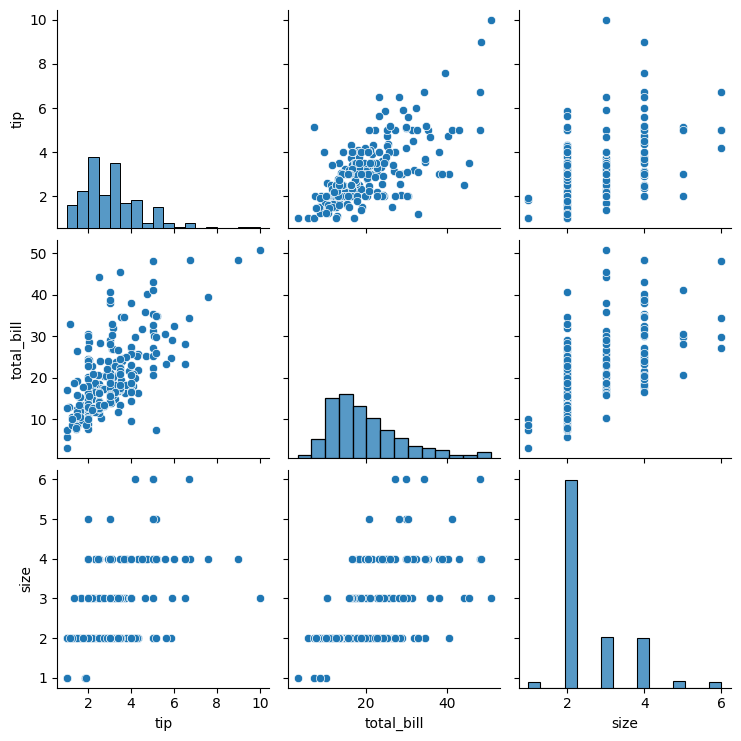

In [1]:
import polars as pl
import seaborn as sns

# データの読み込み
tips = pl.DataFrame(sns.load_dataset("tips"))
display(tips.head())

# データの可視化
# 支払い、sizeとtipの額には相関がありそうだ
# pairplotはpandas.DataFrameのみ
sns.pairplot(data = tips[["tip", "total_bill", "size"]].to_pandas())
# histogramを滑らかにしたいならPairGrid
#g = sns.PairGrid(data = tips[["tip", "total_bill", "size"]])
#g.map_upper(sns.scatterplot, s=15)
#g.map_lower(sns.kdeplot)
#g.map_diag(sns.kdeplot, lw=2)

### 13.2.1 statsmodels

In [2]:
import statsmodels.formula.api as smf

# 回帰分析モデルを学習する
model = smf.ols(formula = "tip ~ total_bill + size", data = tips).fit()

# 学習結果を表示する
display(model.summary())

# 係数を表示する
display(model.params)

# 信頼区間を表示する
display(model.conf_int())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           9.67e-34
Time:                        16:09:16   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept     0.668945
total_bill    0.092713
size          0.192598
dtype: float64

,0,1
Intercept,0.287562,1.050327
total_bill,0.074759,0.110668
size,0.024540,0.360655


### 13.1.2 sklearn

In [3]:
from sklearn import linear_model

# モデルを学習する
lr = linear_model.LinearRegression()
model = lr.fit(X = tips[["total_bill", "size"]], y = tips["tip"])

# 係数と切片を表示する
display(model.coef_)
display(model.intercept_)

array([0.09271334, 0.19259779])

0.6689447408125022